In [119]:
import pandas as pd

data = pd.read_csv(r"C:\Users\karth_f229yzr\Downloads\car_purchasing.csv", encoding='ISO-8859-1') #Google: ISO-8859-1, also known as Latin-1, is an encoding that supports Western European languages. If your CSV file contains characters specific to these languages, ISO-8859-1 ensures these characters are read correctly.

In [120]:
data.head()  # Let's peek at the first few rows of our data.

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [121]:
print(data.dtypes)
# Quick peek at the first few rows of our car data.

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object


In [122]:
data = data.select_dtypes(exclude=['object'])  # Keep only numerical columns, bye-bye text

In [123]:
data.columns = ['gen', 'age', 'sal', 'debt', 'net_worth', 'car_amount']  # Renaming columns to something shorter.

In [124]:
import numpy as np #is it Num-Pie or NumPee

In [125]:
data

,gen,age,sal,debt,net_worth,car_amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [126]:
data.columns = ['gen', 'age', 'sal', 'debt', 'net_worth', 'car_amount']  # Renaming columns to something shorter.

In [127]:
data

,gen,age,sal,debt,net_worth,car_amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


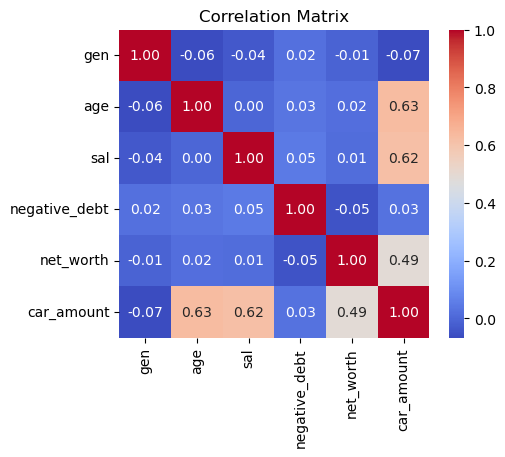

In [169]:
import seaborn as sns  # For fancy plots
import matplotlib.pyplot as plt  # To show our plots

custom_data = data[['gen', 'age', 'sal', 'negative_debt', 'net_worth', 'car_amount']]  # Grab the columns we're interested in

# Compute the correlation matrix
correlation_matrix = custom_data.corr()  # Find out how our features are related

plt.figure(figsize=(5, 4))  # Set up the plot size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Make a heatmap of the correlations
plt.title('Correlation Matrix')  # Title for our plot
plt.show()  # Display the plot


In [165]:
data['negative_debt'] = data['debt'] * -1  # Creating a new column with debt values multiplied by -1

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['debt'] = scaler.fit_transform(data[['debt']])
data['debt'] = 1 - data['debt']  # Invert the scale to make lower values higher

#note THIS CODE DOES NOT WORK, like at all I wanted to make higher debt worse not negative, maybe I multiply by -1 idk

In [131]:
selected_features = data[['age', 'sal', 'net_worth']]  # Picking out the columns we want to use for analysis.


In [132]:
selected_features

,age,sal,net_worth
0,41.851720,62812.09301,238961.2505
1,40.870623,66646.89292,530973.9078
2,43.152897,53798.55112,638467.1773
3,58.271369,79370.03798,548599.0524
4,57.313749,59729.15130,560304.0671
...,...,...,...
495,41.462515,71942.40291,541670.1016
496,37.642000,56039.49793,360419.0988
497,53.943497,68888.77805,764531.3203
498,59.160509,49811.99062,337826.6382


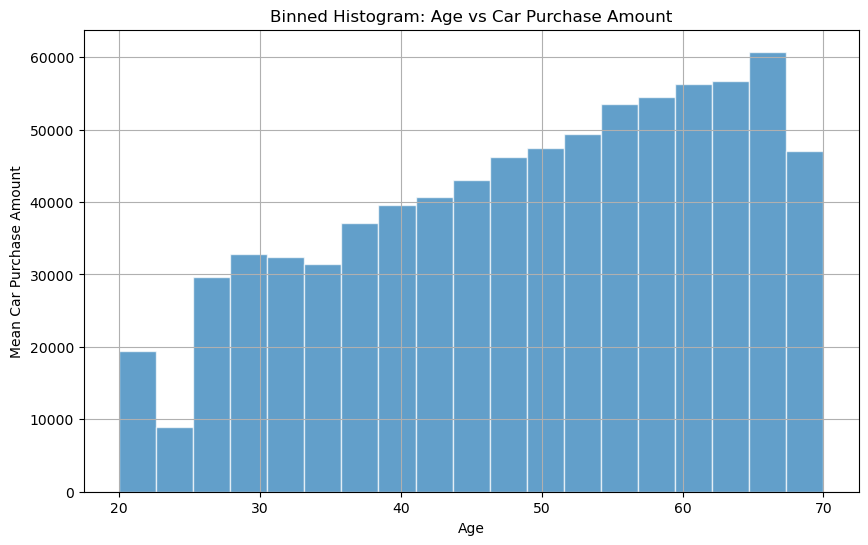

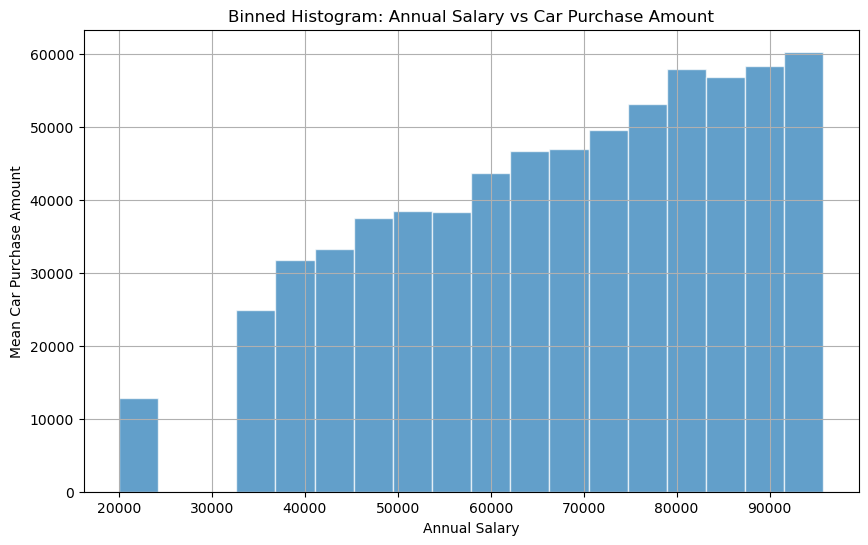

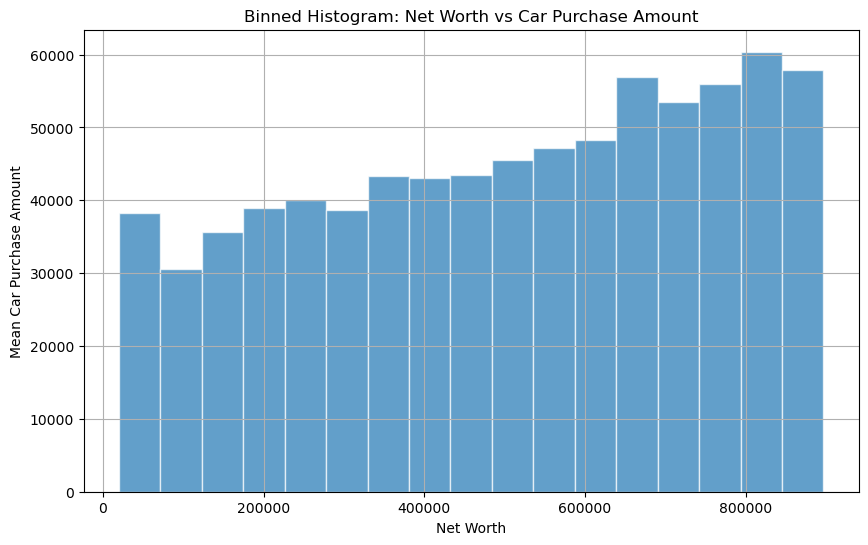

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.concat([selected_features, target], axis=1)

def plot_binned_histogram(x, y, xlabel, ylabel, title):
    # Create bins
    bins = np.linspace(x.min(), x.max(), 20)
    
    # Bin the data
    digitized = np.digitize(x, bins)
    
    # Compute the mean of y values for each bin
    binned_means = [y[digitized == i].mean() for i in range(1, len(bins))]
    binned_counts = [len(y[digitized == i]) for i in range(1, len(bins))]
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], binned_means, width=np.diff(bins), align='edge', alpha=0.7, edgecolor='w')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_binned_histogram(df['age'], df['car_amount'], 'Age', 'Mean Car Purchase Amount', 'Binned Histogram: Age vs Car Purchase Amount')
plot_binned_histogram(df['sal'], df['car_amount'], 'Annual Salary', 'Mean Car Purchase Amount', 'Binned Histogram: Annual Salary vs Car Purchase Amount')
plot_binned_histogram(df['net_worth'], df['car_amount'], 'Net Worth', 'Mean Car Purchase Amount', 'Binned Histogram: Net Worth vs Car Purchase Amount')


In [133]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score  
from sklearn.preprocessing import StandardScaler  

selected_features = data[['age', 'sal', 'net_worth']] 
target = data['car_amount']  # The Y

scaler = StandardScaler()  # Standardizing features
X_scaled = scaler.fit_transform(selected_features)  # Transforming features to the same scale

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)  

model = LinearRegression()  #Kinda the assignment
model.fit(X_train, y_train)  # Training the model

y_train_pred = model.predict(X_train)  # Predicting on training data

accuracy = r2_score(y_train, y_train_pred)  # Evaluating model performance

print(f'Training Accuracy (R-squared): {accuracy:}')  


Training Accuracy (R-squared): 0.9999999811846746


In [174]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import Lasso  # Importing Lasso for regularized regression
from sklearn.metrics import r2_score  
from sklearn.preprocessing import StandardScaler  

selected_features = data[['age', 'sal', 'net_worth']] 
target = data['car_amount']  # The target variable

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features)  # Scaling features to mean 0 and variance 1

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Create and train the Lasso model
lasso_model = Lasso(alpha=1.0)  # Lasso with regularization parameter alpha wolf
lasso_model.fit(X_train, y_train)  

y_train_pred = lasso_model.predict(X_train)  
y_test_pred = lasso_model.predict(X_test) 

# Calculate performance metrics
train_accuracy = r2_score(y_train, y_train_pred)  
test_accuracy = r2_score(y_test, y_test_pred)  

# Output the results
print(f'Training Accuracy (R-squared): {train_accuracy:.4f}')
print(f'Test Accuracy (R-squared): {test_accuracy:.4f}')
print(f'Coefficients: {lasso_model.coef_}')
print(f'Intercept: {lasso_model.intercept_}')


Training Accuracy (R-squared): 0.999999956581842


In [180]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  
}

# Create the Lasso model
lasso = Lasso()

# Perform Grid Search
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Make predictions with the best model
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

# Evaluate performance
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

# Output results
print(f'Best Alpha: {best_alpha}')
print(f'Training Accuracy (R-squared): {train_accuracy:}')
print(f'Test Accuracy (R-squared): {test_accuracy:}')
print(f'Coefficients: {best_lasso.coef_}')
print(f'Intercept: {best_lasso.intercept_}')

Best Alpha: 0.01
Training Accuracy (R-squared): 0.9999999811822724
Test Accuracy (R-squared): 0.9999999810408988
Coefficients: [6707.97862601 6574.61223038 5024.66205242]
Intercept: 44209.81860403991


In [134]:
X_scaled

array([[-0.55074911,  0.05857619, -1.11046945],
       [-0.67383422,  0.38657041,  0.57392937],
       [-0.38750768, -0.71236095,  1.19397625],
       ...,
       [ 0.96624515,  0.57832106,  1.92114437],
       [ 1.62075409, -1.05333541, -0.54019026],
       [ 0.06140832, -0.06470949,  0.18153098]])

In [136]:
y_test_pred = model.predict(X_test)

test_accuracy = r2_score(y_test, y_test_pred)
print(f'Test Accuracy (R-squared): {test_accuracy:}')

Test Accuracy (R-squared): 0.9999999810273109


In [137]:
from sklearn.model_selection import cross_val_score  
cv_scores = cross_val_score(model, X_scaled, target, cv=5, scoring='r2')  # how did I get 99.9, did I mess up
print(f'Cross-Validation R-squared Scores: {cv_scores}')  
print(f'Average Cross-Validation R-squared: {cv_scores.mean()}')  


Cross-Validation R-squared Scores: [0.99999998 0.99999998 0.99999998 0.99999998 0.99999999]
Average Cross-Validation R-squared: 0.9999999803808801


In [138]:


train_indices = X_train.index  # Collecting train data indices, because we’re organized
test_indices = X_test.index  # Collecting test data indices, to check we didn’t mess up

overlap = set(train_indices).intersection(test_indices)
if overlap:
    print(f"data leakage detectedOverlapping indices: {overlap}")  # If there’s overlap, we’ve got a problem
else:
    print("No data leakage. Looks like you didn’t royally mess up.")  # If all’s good, you’re in the clear


No data leakage. Looks like you didn’t royally mess up.


In [182]:

train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

print(f'Training Accuracy (R-squared): {train_accuracy:}')
print(f'Test Accuracy (R-squared): {test_accuracy:}')

Training Accuracy (R-squared): 0.9999999811822724
Test Accuracy (R-squared): 0.9999999810408988


In [140]:
# Run it back, because there's no way 99.9% accuracy is actually right
from sklearn.model_selection import KFold, cross_val_score  # Importing tools to double-check if we’re dreaming

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Setting up cross-validation, because one split just isn’t enough

cv_scores = cross_val_score(model, X_scaled, target, cv=kf, scoring='r2')  

print(f'Cross-Validation R-squared Scores: {cv_scores}')  
print(f'Average Cross-Validation R-squared: {cv_scores.mean()}')  # Averaging the model’s attempts to prove it’s not a fluke


Cross-Validation R-squared Scores: [0.99999998 0.99999998 0.99999999 0.99999998 0.99999997]
Average Cross-Validation R-squared: 0.9999999802755418


In [188]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=kf)

grid_search.fit(X_scaled, target)

best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

cv_scores = cross_val_score(best_lasso, X_scaled, target, cv=kf, scoring='r2')

print(f'Best Alpha: {best_alpha}')
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Average Cross-Validation R-squared: {cv_scores.mean()}')

Best Alpha: 0.01
Cross-Validation R-squared Scores: [0.99999998 0.99999998 0.99999999 0.99999998 0.99999997]
Average Cross-Validation R-squared: 0.9999999802733779
